# Imports

In [495]:
# imports
%pip install geopandas matplotlib
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display

Note: you may need to restart the kernel to use updated packages.


# CO2

In [497]:
unavg_co2_df = pd.read_csv('co2.csv')

# Get rid of unnecessary columns
unavg_co2_df = unavg_co2_df[['Year', 'Carbon Dioxide Fit (ppm)']]

##### Average years for cleaner output

In [499]:
# group by year, calculate mean for ppm
co2_df = unavg_co2_df.groupby('Year')['Carbon Dioxide Fit (ppm)'].mean().reset_index()

# rename column
co2_df.columns = ['Year', 'Average CO2 (ppm)']

##### Remove 1958 and 2017 to filter unclean data

In [501]:
co2_df = co2_df[~co2_df['Year'].isin([1958, 2017])]

# Temps

In [507]:
temps_country_df = pd.read_csv('temps_global.csv')

# rename column
temps_country_df.columns = ['Year', 'AverageTemperature', 'Uncertainty', 'Country']

##### Substring dates for readability

In [510]:
temps_country_df['Year'] = temps_country_df['Year'].astype(str).str[:4]


# cast years to int
temps_country_df['Year'] = temps_country_df['Year'].astype(int)

##### Drop NaN Values

In [513]:
temps_country_df = temps_country_df[temps_country_df['AverageTemperature'].notna()]

temps_country_df = temps_country_df.sort_values(by=['Country', 'Year'])

# initialize new column for % change
temps_country_df['% Change'] = temps_country_df.groupby('Country')['AverageTemperature'].pct_change() * 100

##### Average temps by year

In [516]:
temps_country_df = temps_country_df.groupby('Year')['AverageTemperature'].mean().reset_index()
correlation_df = pd.merge(temps_country_df, co2_df, on='Year')

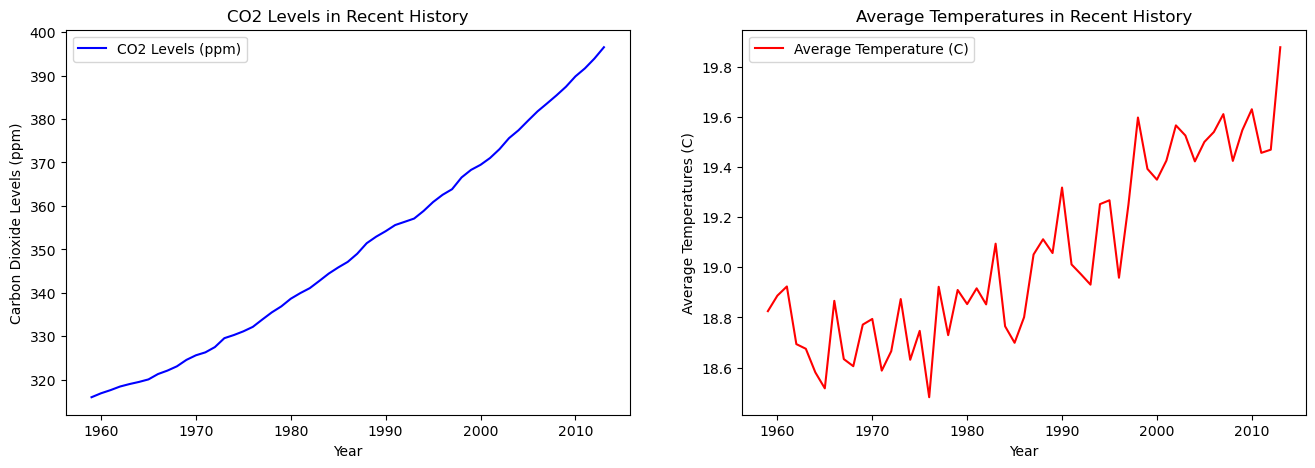

In [518]:
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(16, 5))
gs = GridSpec(1, 2, figure=fig)

# First subplot for CO2 levels
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(correlation_df['Year'], correlation_df['Average CO2 (ppm)'], label='CO2 Levels (ppm)', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon Dioxide Levels (ppm)')
ax1.set_title('CO2 Levels in Recent History')
ax1.legend()

# Second subplot for Average Temperatures
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(correlation_df['Year'], correlation_df['AverageTemperature'], label='Average Temperature (C)', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Temperatures (C)')
ax2.set_title('Average Temperatures in Recent History')
ax2.legend()

# Display the plots
plt.show()

# Trees

In [521]:
trees_df = pd.read_excel('forest-cover-v1.xlsx')

# filter columns
columns_to_keep = ['Country Name', 'Country Code'] + [col for col in trees_df.columns if 'Forest Area' in col]
trees_df = trees_df[columns_to_keep]

### Maps

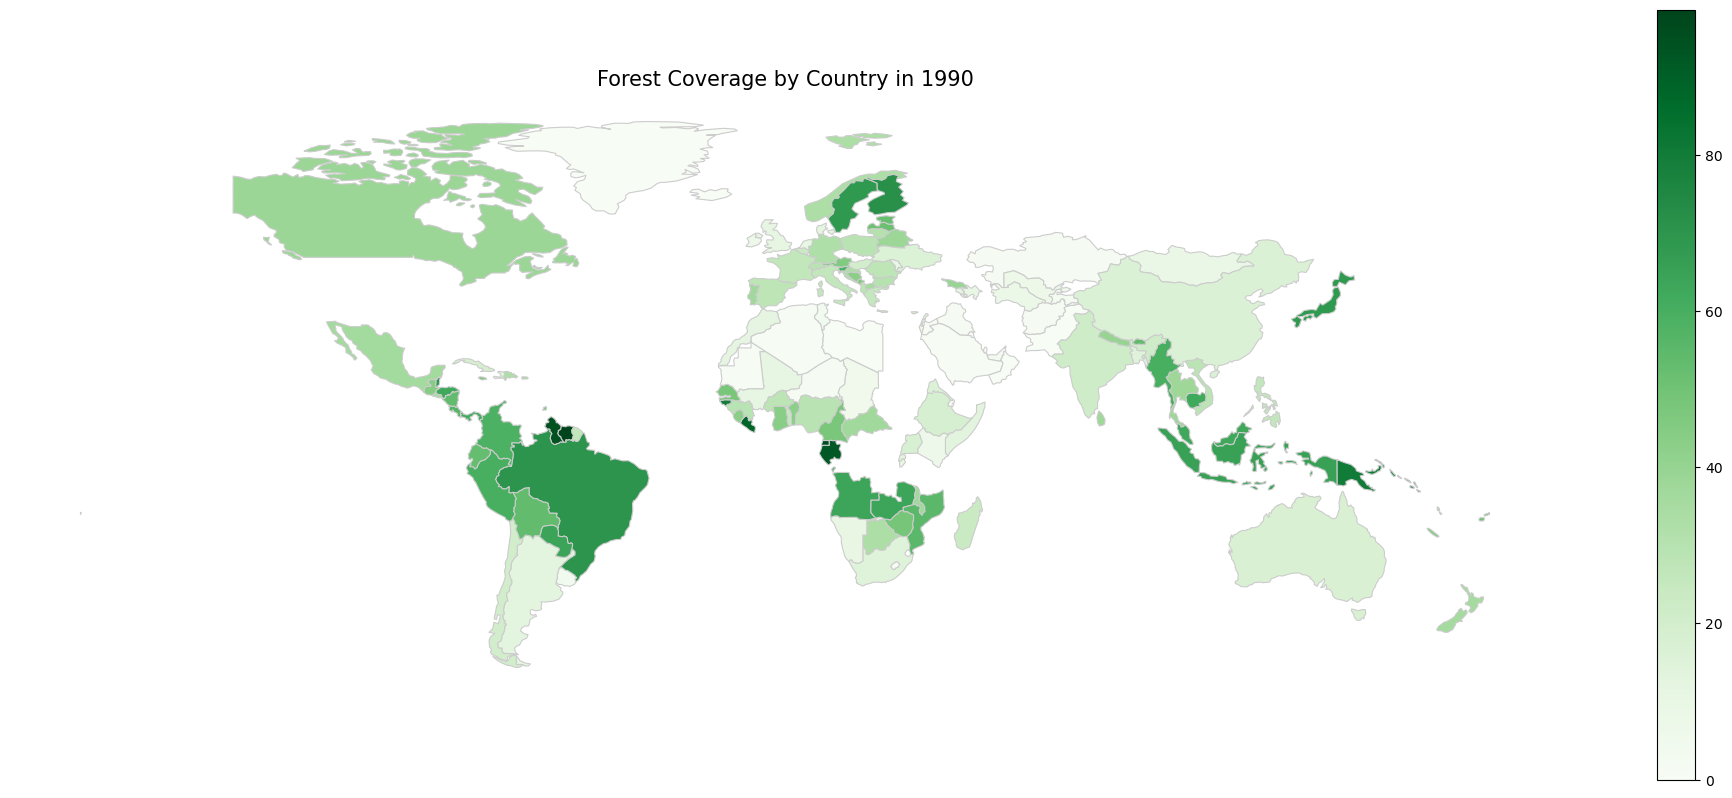

In [528]:
world = gpd.read_file('world/world_lowres.shp')

merged = world.merge(trees_df, how='left', left_on='ADMIN', right_on='Country Name')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
merged.plot(column="Forest Area 1990", cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and axis off
ax.set_title('Forest Coverage by Country in 1990', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')

plt.show()

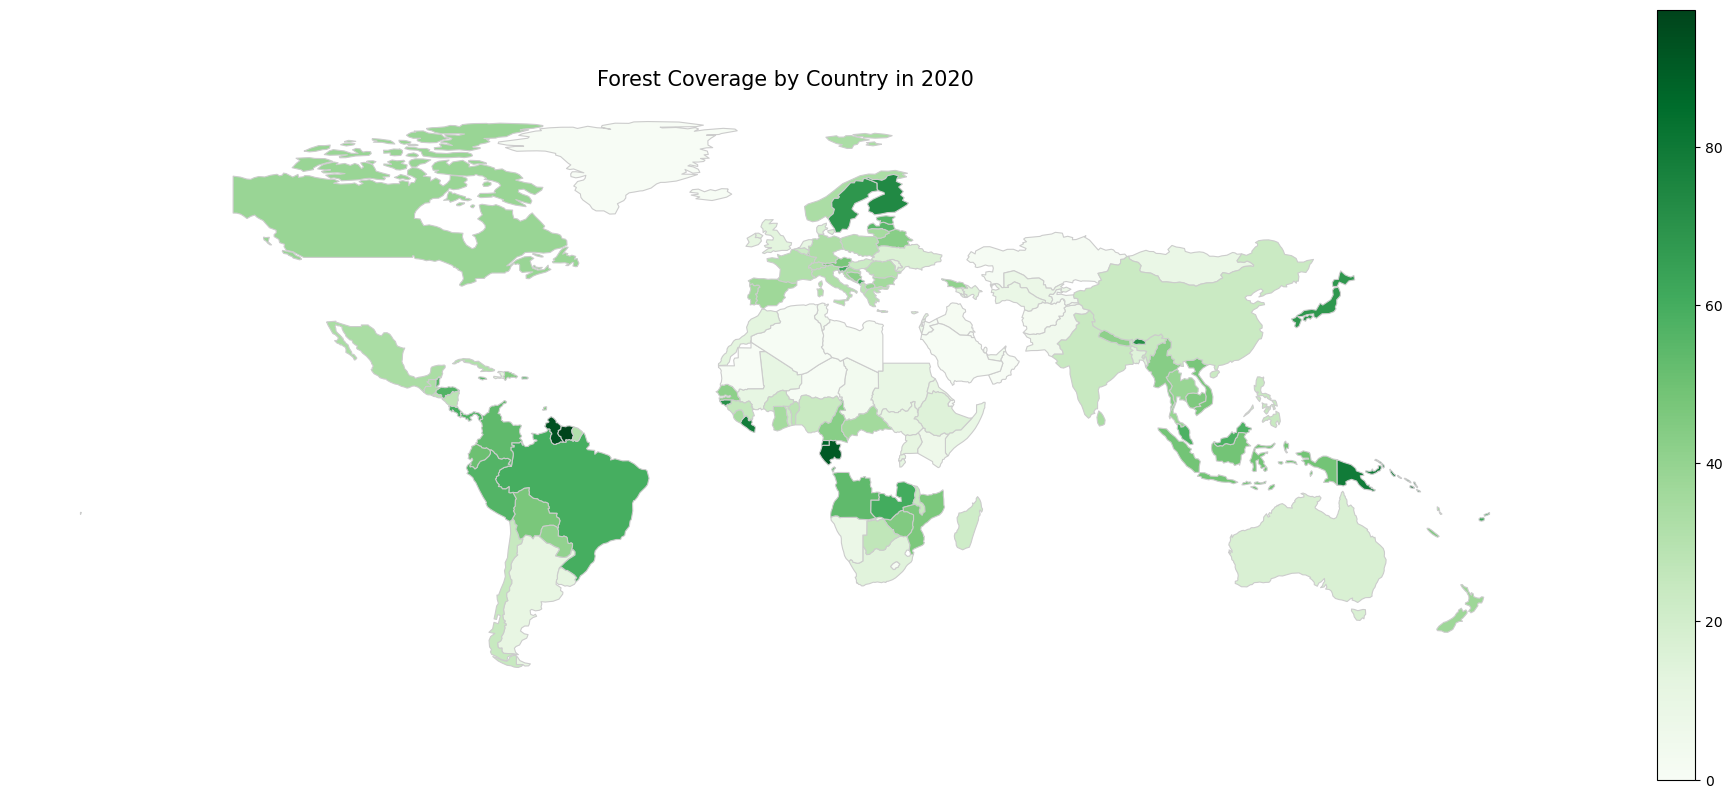

In [529]:
world = gpd.read_file('world/world_lowres.shp')

merged = world.merge(trees_df, how='left', left_on='ADMIN', right_on='Country Name')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
merged.plot(column="Forest Area 2020", cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and axis off
ax.set_title('Forest Coverage by Country in 2020', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.axis('off')

plt.show()

# Well that doesn't look like much

## Let's track the top 5 biggest changes in forest coverage

In [534]:
# Calculate the difference between Forest Area 2020 and Forest Area 1990
trees_df['Difference 1990-2020'] = trees_df['Forest Area 2020'] - trees_df['Forest Area 1990']

# Sort the DataFrame by the difference in descending order
top_countries = trees_df.sort_values(by='Difference 1990-2020', ascending=False)

# Get the top 5 countries
top_5_countries = top_countries.head(5)

# Display the top 5 countries with the highest difference
top_5_countries[['Country Name', 'Forest Area 1990', 'Forest Area 2020', 'Difference 1990-2020']]
top_5_countries.head()

,Country Name,Country Code,Forest Area 1990,Forest Area 1991,Forest Area 1992,Forest Area 1993,Forest Area 1994,Forest Area 1995,Forest Area 1996,Forest Area 1997,...,Forest Area 2012,Forest Area 2013,Forest Area 2014,Forest Area 2015,Forest Area 2016,Forest Area 2017,Forest Area 2018,Forest Area 2019,Forest Area 2020,Difference 1990-2020
155,Puerto Rico,PRI,36.113867,37.340699,38.567531,39.794363,41.021195,42.248027,43.474859,44.701691,...,55.515445,55.570237,55.625028,55.679820,55.735062,55.790304,55.845547,55.900789,55.956032,19.842165
207,Vietnam,VNM,28.805678,29.545528,30.285379,31.025230,31.765080,32.504931,33.244782,33.984632,...,44.046764,44.481375,44.915987,45.350598,46.369142,46.490760,46.735544,46.980327,47.225110,18.419433
29,Bhutan,BTN,53.650665,53.863151,54.075637,54.288124,63.980704,64.230151,64.479598,64.729045,...,71.077105,71.128998,71.180890,71.232783,71.234270,71.286179,71.345569,71.397483,71.449397,17.798732
130,Montenegro,MNE,46.542751,46.542751,46.542751,46.542751,46.542751,46.542751,46.542751,46.542751,...,61.486989,61.486989,61.486989,61.486989,61.486989,61.486989,61.486989,61.486989,61.486989,14.944238
44,Cuba,CUB,19.162011,19.513035,19.864060,20.215084,20.566108,20.917132,21.268156,21.619181,...,28.437210,29.583573,30.124976,30.585975,31.151480,31.233141,31.233141,31.233141,31.233141,12.071129


## The top 5 changes are increases? This goes against expectations

### Ok, let's calculate % change then to get a sense of things

In [538]:
# make new DF with basic columns
percent_change_df = trees_df[['Country Name', 'Country Code']].copy()

# loop each year from 1991 to 2021 to calculate percent change
for year in range(1991, 2021):
    current_year = f'Forest Area {year}'
    previous_year = f'Forest Area {year - 1}'
    percent_change_col = f'% Change {year}'

    # calculate change and add as new column
    percent_change_df[percent_change_col] = ((trees_df[current_year] - trees_df[previous_year]) / trees_df[previous_year]) * 100

### Lets see what this data looks like on Switzerland

Text(0.5, 1.0, 'Yearly % Change in Forest Coverage in Switzerland')

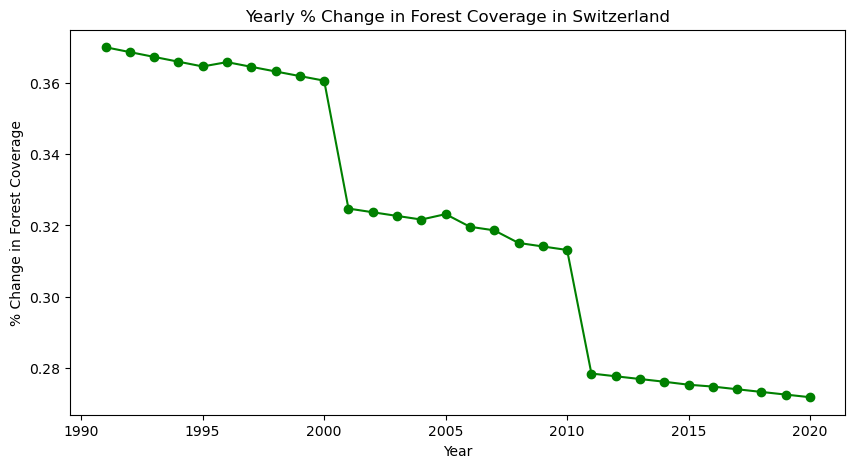

In [541]:
switzerland_data = percent_change_df[percent_change_df['Country Name'] == 'Switzerland']

years = list(range(1991, 2021))
percent_changes = [switzerland_data[f'% Change {year}'].values[0] for year in years]

plt.figure(figsize=(10,5))
plt.plot(years, percent_changes, marker='o', linestyle='-', color='green', label='Switzerland')

plt.xlabel('Year')
plt.ylabel('% Change in Forest Coverage')
plt.title('Yearly % Change in Forest Coverage in Switzerland')